#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading Data and Look at That

In [2]:
df = pd.read_csv("winequality-white.csv", sep=';')

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
# Number of rows and columns
print("Rows, columns: ", df.shape)

Rows, columns:  (4898, 12)


In [5]:
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


That's good!

##### Look at the Quality

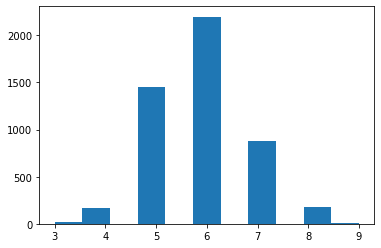

In [6]:
plt.hist(df['quality'], bins = 11)
plt.show()

In [7]:
pd.value_counts(df['quality'])

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

##### Look at the Correlations

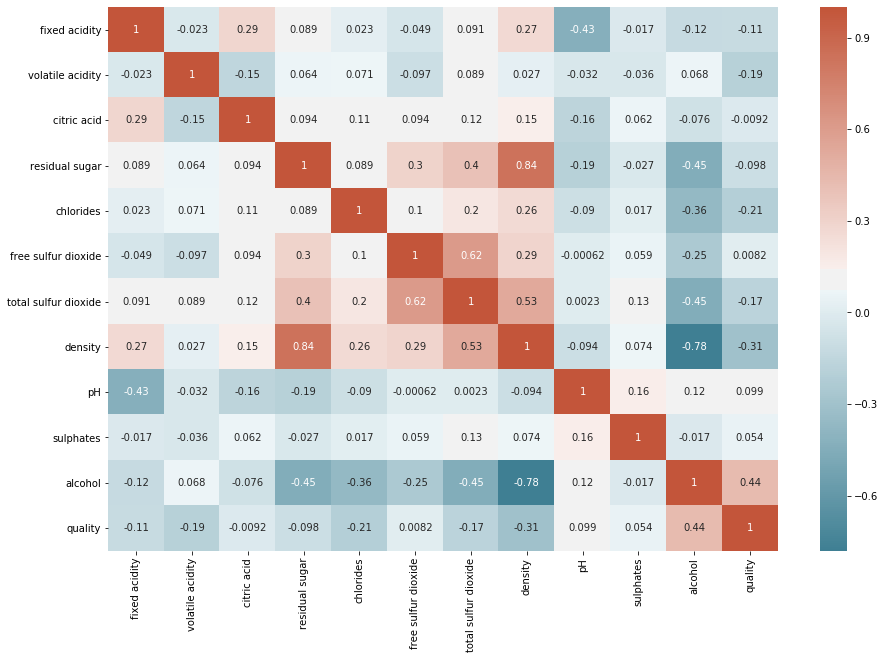

In [8]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### Convert into Binary Classification Problem with Good Wine as more or equal to 7

In [9]:
# Create Target Variable
df['is_good'] = [1 if x >= 7 else 0 for x in df['quality']]

In [10]:
pd.value_counts(df['is_good'])

0    3838
1    1060
Name: is_good, dtype: int64

##### Separate Predictors and Target

In [11]:
X = df.drop(['quality','is_good'], axis = 1)
y = df['is_good']

##### Normalize Featurer 

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
X_features = X
X = StandardScaler().fit_transform(X)

##### Split into Train and Test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

### Model 1: Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [17]:
model1 = RandomForestClassifier(random_state=1)
model1.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [18]:
y_pred1 = model1.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       963
           1       0.81      0.54      0.65       262

    accuracy                           0.87      1225
   macro avg       0.85      0.75      0.78      1225
weighted avg       0.87      0.87      0.86      1225



### Model 2: XGBoost

In [20]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
import xgboost as xgb

In [22]:
model2 = xgb.XGBClassifier(random_state=1)
model2.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:30:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [23]:
y_pred2 = model2.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       963
           1       0.72      0.59      0.65       262

    accuracy                           0.86      1225
   macro avg       0.81      0.77      0.78      1225
weighted avg       0.86      0.86      0.86      1225

